In [12]:
import sys

import pandas as pd

import random

In [13]:
def predict(feature, padding):
    d = {'a': 2, 'b': 4, 'c': 8, 'e': 1}
    length = len(feature)
    shex = hex(d['a'] + d['e'])
    ahex = hex(d['a'] + d['b'])
    bhex = [hex(d['b']), hex(d['c'])]
    chex = [hex(d['c']), hex(d['e'])]
    ehex = hex(d['e'])
    label = ''
    for i, c in enumerate(feature):
        twothird = 2 * len(feature) // 3
        if c == 'a':
            label += ahex
        elif c == 'b':
            if i == twothird-1:
                label += bhex[1]
            else:
                label += bhex[0]
        else:
            if i == length-1:
                label += chex[1]
            else:
                label += chex[0]
    label = shex + label + ehex + ehex*(padding-length-2)
    fea = 's' + feature + 'e' + 'e'*(padding-length-2)
    return fea, label

def positive(minlen, maxlen):
    rmin = (minlen - 2 )//3
    rmax = (maxlen - 2 )//3
    r = random.randint(rmin+1, rmax)
    return 'a'*r + 'b'*r + 'c'*r

def generate(count, minlen, maxlen):
    li = list()
    c = 0
    while c < count:
        s = positive(minlen, maxlen)
        sp, pp = predict(s, maxlen)
        li.append((sp, pp))
        c += 1
    return li

## generate train

In [12]:

l = generate(20000, 0, 32)

df = pd.DataFrame(l)

df.to_csv('anbncn_train', header=None, index=None)

In [1]:
# generate train special

In [2]:
ehex = hex(1)

In [4]:
df = pd.read_csv('anbncn_train', header=None, index_col=None)


In [5]:
l = df.values.tolist()

In [7]:
ll = list()
for f, t in l:
    if len(f) == 32:
        f = f + 'e'*32
        t = t + ehex * 32
        ll.append([f, t])
    else:
        ll.append([f, t])


In [8]:
count = 0
for f, t in ll:
    if len(f) != 64:
        count = count + 1
count

0

In [9]:
df = pd.DataFrame(ll)
df.to_csv('anbncn_train', header=None, index=None)

## generate test1

In [13]:
l = generate(1000, 0, 32)

df = pd.DataFrame(l)

df.to_csv('anbncn_test1', header=None, index=None)

## generate test2

In [14]:
l = generate(1000, 32, 64)

df = pd.DataFrame(l)



In [15]:
df.to_csv('anbncn_test2', header=None, index=None)

## generate test3

In [15]:
l = generate(1000, 64, 128)

df = pd.DataFrame(l)

df.to_csv('anbncn_test3', header=None, index=None)

## generate test4

In [16]:
l = generate(1000, 128, 256)

df = pd.DataFrame(l)

df.to_csv('anbncn_test4', header=None, index=None)

## generate test5

In [17]:
l = generate(1000, 256, 512)

df = pd.DataFrame(l)

df.to_csv('anbncn_test5', header=None, index=None)

<BarContainer object of 10 artists>

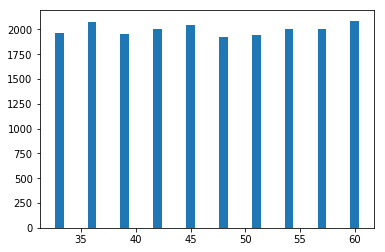

In [13]:
import pandas as pd

import matplotlib.pyplot as plt

# check length

anbncn = pd.read_csv('anbncn_test2', header=None, index_col=None)

anbncnl = anbncn.values.tolist()

anbncnll = list(map(lambda x: len(x[0][x[0].find('s')+1: x[0].find('e')]), anbncnl))

from collections import defaultdict
anbncnd = defaultdict(lambda: 0)
for i in anbncnll:
    anbncnd[i] += 1

plt.bar(anbncnd.keys(), anbncnd.values())